# EPIDEMIOLOGICAL PREDICTIVE MODELS SCNENARIOS

Keep in mind that the values used as inputs are fantasy as well as the output scnenarios and are only here for an educational illustration objective.  
Non of these should be entirely representative of the reality.  
Please see the corresponding publication to this work. Special thanks for Gonzales' public work, good inspirator, whitout him this work below would not have been possible.

##### The eleven parameters that have been used are (for both SIR and SEIIRS model):   
-  rbeta = infection rate of infected asymptomatic people (weaker than symptomatics ones)


-  pa =  fraction of Exposed (latent) people becoming infectious asymptomatic people afterwards


-  R0 =  basic reproduction number = p * k * d = beta / mu


-  mu = recovering rate = 1 / d


-  phi =  immunity lost rate  


-  beta = R0 * mu / (pa * rbeta + (1-pa)) = infection rate with 2 infectious compartments Ia and Is for SEIIRS model (for SIR model, beta is a value directly given within the code)


-  epsilon = rate of transition  


-  N = 1000000 = number total population  


-  E0 = number of people initial exposed (who will become infectious)  


-  S0 = N - E0 = nb Succeptibles  


-  pd = rate of death 

        - Note: k = number contact(s)/day; p = I(t)/N = pb infection = passage from S to I (when I and S meet);                                      d = number of days person remains infectious

In [1]:
# import libraries
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure # to make plot bigger

## SEIIRS MODEL

In [9]:
# The SEIIRS model

def SEIIRS_model(z, t, rbeta, beta, mu, epsilon, phi, pa, pd, N):
    IatN = z[2] / N #  number infected asym
    IstN = z[3] / N #  number infected sym
    
    # dS/dt 
    dSdt = -(beta * z[0] * IstN)  - (beta * rbeta * z[0] * IatN) + (phi * z[5]) 
    # dE/dt 
    dEdt = (beta * rbeta * z[0] * IatN) + (beta * z[0] * IstN) - (epsilon * z[1] * pa) - (epsilon * z[1] * (1-pa))
    # dIa/dt 
    dIadt = (pa * epsilon * z[1]) - (mu * z[2])
    # dIs/dt 
    dIsdt = ((1 - pa) * epsilon * z[1]) - (mu * z[3] * pd) - (mu * (1-pd) * z[3])
    # dR/dt 
    dRdt = (mu * z[2]) + (mu * (1-pd) * z[3]) - (phi * z[4])
    # dD/dt
    dDdt = mu * pd * z[3] 
    return([dSdt, dEdt, dIadt, dIsdt, dRdt, dDdt])

In [10]:
def ODE_SEIIRS(rbeta, mu, epsilon, phi, pa, pd, R0, N, E0):

    beta = R0 * mu / (pa * rbeta +(1-pa)) # infection rate with 2 infectious compartments Ia and Is
    S0 = N - E0 # nb Succeptibles
    z0 = [S0, E0, 0, 0, 0, 0] # initial parameters
    
    t = np.linspace(0, 365)
    z = odeint(SEIIRS_model, z0, t, args=(rbeta, beta, mu, epsilon, phi, pa, pd, N)) # returns Z = updated param.
    return z,t,beta

In [73]:
def plot_SEIIRS(rbeta, mu, epsilon, phi, pa, pd, R0, N, E0):
    
    # import params from the ODE resolution
    z,t,beta = ODE_SEIIRS(rbeta, mu, epsilon, phi, pa, pd, R0, N, E0)
    
    # ploting part
    figure(figsize=(8, 6), dpi=86) # makes plot bigger
    plt.plot(t, z[:,0], label= None ,color = 'white')# X times the same in order to
    plt.plot(t, z[:,0], label= None ,color = 'white')# be able to print the X
    plt.plot(t, z[:,0], label= None ,color = 'white')# params legends outside,
    plt.plot(t, z[:,0], label= None ,color = 'white')# does not work overwise
    plt.plot(t, z[:,0], label= None ,color = 'white')
    plt.plot(t, z[:,0], label= None ,color = 'white')
    plt.plot(t, z[:,0], label= None ,color = 'white')
    plt.plot(t, z[:,0], label= None ,color = 'white')
    plt.plot(t, z[:,0], label= None ,color = 'white')

    # parameters and compartments ploting
    params = plt.legend((
                         'rbeta = '+ str(rbeta),
                         'pa = '+ str(pa),
                         'mu = '+ str(mu)),
                         loc='best',
                         prop={'size': 12})
                        #bbox_to_anchor=(1, 0.5)) # outside plot 
    plt.plot(t, z[:,0], label='Succeptibles')
    plt.plot(t, z[:,1], label='Exposed/Latents')
    plt.plot(t, z[:,2], label='Asymptomatics')
    plt.plot(t, z[:,3], label='Symptomatics')
    plt.plot(t, z[:,4], label='Recovered')
    plt.plot(t, z[:,5], label='Deaths', color='black')
    #plt.title("Compartments' dynamical evolutions over time")
    #plt.xlabel('Time in days')
    #plt.ylabel('Population')
    
      # incorporates compartments legends as a 1st legend
    #plt.legend(loc='center left', prop={'size': 12})
    
      # incorporates params legends as a 2nd legend 
    plt.gca().add_artist(params) 
    
    # to safe image in folder and avoid undesirable, whitespace around the image
    #plt.savefig('foo1.png', bbox_inches='tight')
    
    return plt.figure()

<Figure size 432x288 with 0 Axes>

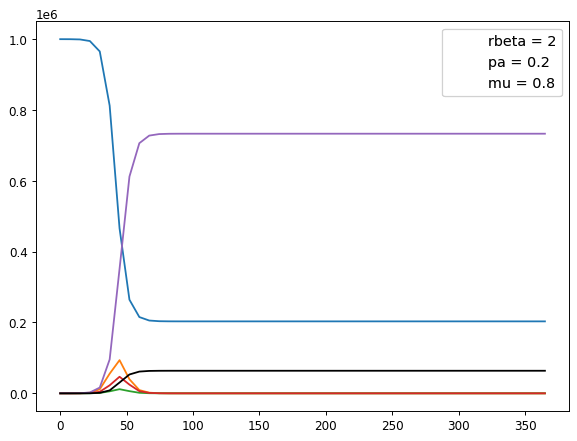

<Figure size 432x288 with 0 Axes>

In [228]:
# plots with differents parameters (inputs) to see different predictions (output) scenarios
#plot_SEIIRS(rbeta = 0.75,pa = 0.4,R0 = 2,mu = 0.1,phi = 0.01,epsilon = 0.5,N = 1000000,E0 = 10,pd = 0.1) # 1
#plot_SEIIRS( rbeta = 1.5,pa = 0.8,R0 = 2.0,mu = 0.1,phi = 0.01,epsilon = 1,N = 1000000,E0 = 10,pd = 0.1) # 2 
#plot_SEIIRS(rbeta = 2,pa = 0.9,R0 = 2.0,mu = 0.1,phi = 0.01,epsilon = 1.5,N = 1000000,E0 = 10,pd = 0.1) # 3
#plot_SEIIRS(rbeta =0.75,pa = 0.8,R0 = 2.0,mu = 0.05,phi = 0.01,epsilon = 0.5,N = 1000000,E0 = 10,pd = 0.1) # 4
#plot_SEIIRS(rbeta = 1,pa = 0.4,R0 = 2.0,mu = 0.1,phi = 0.01,epsilon = 0.8,N = 1000000,E0 = 10,pd = 0.1) # 5
plot_SEIIRS(rbeta = 2,pa = 0.2,R0 = 2.0,mu = 0.8,phi = 0,epsilon = 0.5,N = 1000000,E0 = 10,pd = 0.1) # 6

In [ ]:
params = plt.legend(('R0 = '+ str(R0),
                         'E0 = '+ str(E0),'phi = '+ str(phi),
                         'rbeta = '+ str(rbeta),
                         'beta = '+ str(round(beta,2)), 
                         'epsilon = '+ str(epsilon),
                         'pa = '+ str(pa),
                         'pd = '+str(pd),
                         'mu = '+ str(mu)),
                         loc='best',
                         prop={'size': 12})
                        #bbox_to_anchor=(1, 0.5)) # outside plot 

##  SIR MODEL

In [86]:
# The SIR Model
def SIRmodel(z, t, N, beta, mu):

    ItN = z[1] / N # I(t)/N = fraction of infected people
    
    dSdt = -beta * z[0] * ItN  # dS/dt
    dIdt = beta * z[0] * ItN - (mu * z[1]) # dIa/dt
    dRdt = (mu * z[1]) # dR/dt
    return([dSdt, dIdt, dRdt])

In [91]:
def ODE_SIR (N, beta, mu, I0, R0):

    # infection rate with only one infectious compartment I
    S0 = N - I0 # nb Succeptibles
    z0 = [S0, I0, R0] # initial parameters
    
    t = np.linspace(0, 365)
    z = odeint(SIRmodel, z0, t, args=(N, beta, mu)) # returns Z = updated param.
    return z,t

In [226]:
def plot_SIR(N, beta, mu, I0, R0):
    z,t = ODE_SIR(N, beta, mu, I0, R0)
    figure(num=None, figsize=(8, 6), dpi=80) # makes plots bigger
    plt.plot(t, z[:,0], label= None ,color = 'white')# N times the same in order to
    plt.plot(t, z[:,0], label= None ,color = 'white')# be able to print the
    plt.plot(t, z[:,0], label= None ,color = 'white')# params legends N-times,
    plt.plot(t, z[:,0], label= None ,color = 'white')# does not work overwise
    params = plt.legend(('R0 = '+ str(R0),
                        'mu = '+ str(mu), 
                        'beta = '+ str(beta)),
                        loc='best')
                        #bbox_to_anchor=(1, 0.5))
    plt.plot(t, z[:,0], label='Succeptibles', color = 'tab:blue')
    plt.plot(t, z[:,1], label='Infected', color = 'tab:orange')
    plt.plot(t, z[:,2], label='Recovered', color = 'tab:green')
    #plt.xlabel('Time in days')
    #plt.ylabel('Population')

    #plt.legend(loc= 'center')
    plt.gca().add_artist(params)
    # to safe image in folder and avoid undesirable, whitespace around the image
    plt.savefig('SIR6.png', bbox_inches='tight')
    
    return plt.figure()

<Figure size 432x288 with 0 Axes>

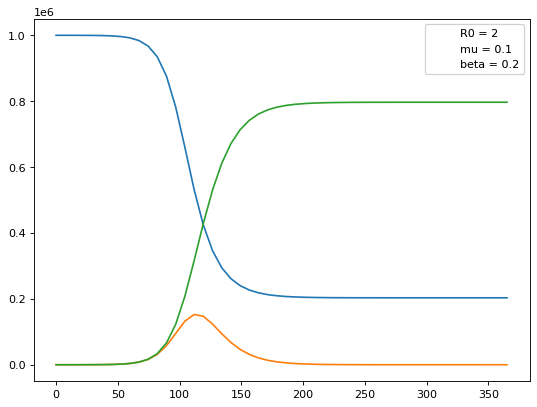

<Figure size 432x288 with 0 Axes>

In [227]:
plot_SIR(N= 1000000, beta = 0.2, mu = 0.1, I0 = 10, R0 = 2)

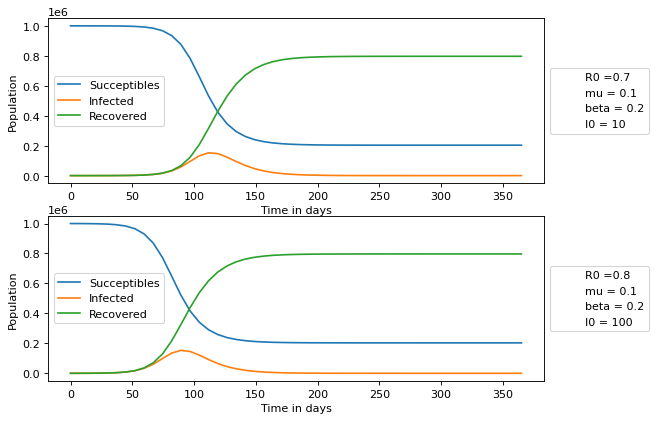

In [237]:
# ploting SIR Model


figure(num=None, figsize=(8, 6), dpi=80) # makes plots bigger


# 1st plot with set of parameters-------------------
# parameters
R0 = 0.7 # basic reproduction number
mu = 0.1 # recovering rate
beta = 0.2  # infection rate with 1 infectious compartment only
N = 1000000 # pop. size
I0 = 10 # number of initial infectious 
S0 = N - I0 # nb Succeptibles
z0 = [S0, I0, R0] # initial parameters
t = np.linspace(0, 365) # number days on one bisextile year
z = odeint(SIRmodel, z0, t, args=(N, beta, mu))  # returns Z = updated param.
# plot
plt.subplot(2, 1, 1)
plt.plot(t, z[:,0], label= None ,color = 'white')# 4 times the same in order to
plt.plot(t, z[:,0], label= None ,color = 'white')# be able to print the
plt.plot(t, z[:,0], label= None ,color = 'white')# params legends outside,
plt.plot(t, z[:,0], label= None ,color = 'white')# does not work overwise
params = plt.legend(('R0 ='+ str(R0),'mu = '+ str(mu), 
                    'beta = '+ str(beta), 'I0 = '+ str(I0)),
                    loc='center left',
                    bbox_to_anchor=(1, 0.5))
plt.plot(t, z[:,0], label='Succeptibles', color = 'tab:blue')
plt.plot(t, z[:,1], label='Infected', color = 'tab:orange')
plt.plot(t, z[:,2], label='Recovered', color = 'tab:green')
plt.xlabel('Time in days')
plt.ylabel('Population')

plt.legend(loc='center left')
plt.gca().add_artist(params)

#ax = plt.subplot(111)


# 2nd plot with set of parameters ------------------
R0 = 0.8 # basic reproduction number
mu = 0.1 # recovering rate
beta = 0.2
N = 1000000 # pop. size
I0 = 100
S0 = N - I0 # nb Succeptibles
z0 = [S0, I0, R0]
t = np.linspace(0, 365) # on one bisextile year
z = odeint(model, z0, t, args=(N, beta, mu))

plt.subplot(2, 1, 2)
plt.plot(t, z[:,0], label= None ,color = 'white')# 4 times the same in order to
plt.plot(t, z[:,0], label= None ,color = 'white')# be able to print the
plt.plot(t, z[:,0], label= None ,color = 'white')# params legends outside,
plt.plot(t, z[:,0], label= None ,color = 'white')# does not work overwise
params = plt.legend(('R0 ='+ str(R0),'mu = '+ str(mu), 
                    'beta = '+ str(beta), 'I0 = '+ str(I0)),
                    loc='center left',
                    bbox_to_anchor=(1, 0.5))
plt.plot(t, z[:,0], label='Succeptibles', color = 'tab:blue')
plt.plot(t, z[:,1], label='Infected', color = 'tab:orange')
plt.plot(t, z[:,2], label='Recovered', color = 'tab:green')
plt.xlabel('Time in days')
plt.ylabel('Population')

plt.legend(loc='center left')
plt.gca().add_artist(params)

# show all
plt.show()

In [238]:
# SEIIRS REMAINING CODE
rbeta = 0.75 # fraction of infectious being asymptomatic (less than symptomatics)
pa = 0.4 # fraction of Exposed (latent) becoming asymptomatic afterwards
R0 = 2.0 # basic reproduction number
mu = 0.1 # recovering rate
phi = 0.01 # immunity lost rate
beta = R0 * mu / (pa * rbeta+(1-pa)) # infection rate with 2 infectious compartments Ia and Is
epsilon = 0.5 # rate of transition
N = 1000000 # number total population 
E0 = 10 # number initial exposed (who will become infectious)
S0 = N - E0 # nb Succeptibles
z0 = [S0, E0, 0, 0, 0, 0] # initial parameters
pd = 0.1 # rate of death

t = np.linspace(0, 365) # number days on one bisextile year
z = odeint(SEIIRS_model, z0, t, args=(rbeta, beta, mu, epsilon, phi, pa, pd)) # returns Z = updated param.

figure(figsize=(8, 6), dpi=86) # makes plot bigger
plt.plot(t, z[:,0], label='Succeptibles')
plt.plot(t, z[:,1], label='Exposed/Latents')
plt.plot(t, z[:,2], label='Asymptomatics')
plt.plot(t, z[:,3], label='Symptomatics')
plt.plot(t, z[:,4], label='Recovered')
plt.plot(t, z[:,5], label='Deaths', color='black')
plt.title("Compartments' dynamical evolutions over time")
plt.xlabel('Time in days')
plt.ylabel('Population')
plt.legend(loc='best')

TypeError: SEIIRS_model() missing 1 required positional argument: 'N'